In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv(r'C:\Users\15721\Desktop\movies.csv')

In [4]:
# looking at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
# checking for missing data
# looping through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [38]:
df = df.dropna()

In [39]:
# Data Types for our columns

print(df.dtypes)

name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes       float64
director      int16
writer        int16
star          int16
country        int8
budget      float64
gross       float64
company       int16
runtime     float64
Year           int8
dtype: object


<AxesSubplot:>

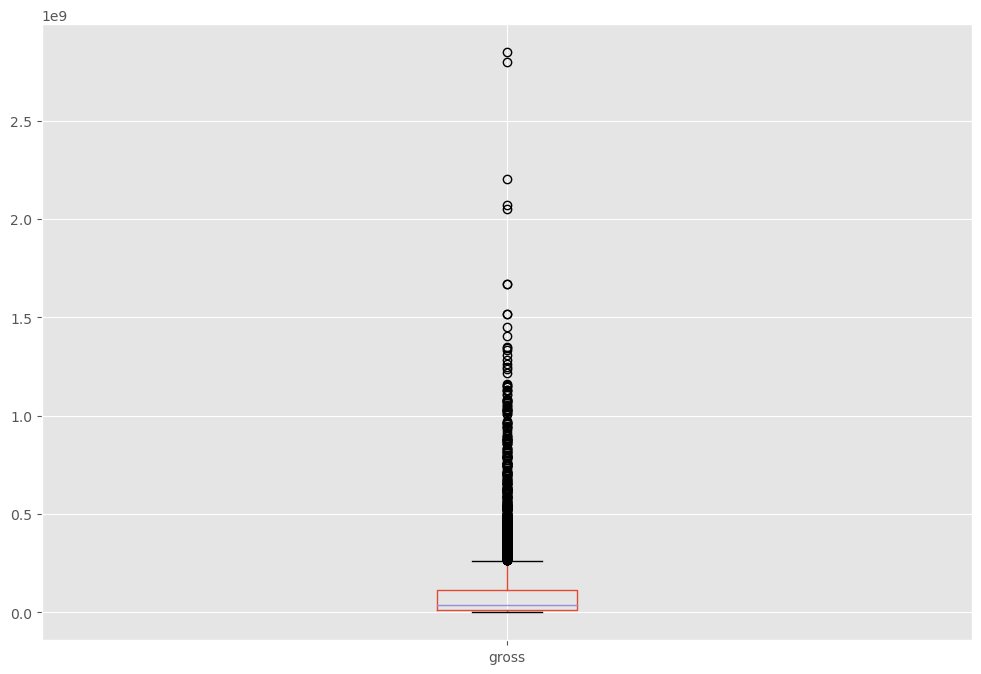

In [40]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [41]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,574,6,0,2020,1201,6.6,140000.0,24,3365,2761,55,90000000.0,426505244.0,731,124.0,12
7649,5037,4,0,2020,944,6.5,102000.0,1251,3253,229,55,85000000.0,319715683.0,1812,99.0,11
7650,1619,4,1,2020,1201,5.6,53000.0,2606,4007,2241,55,175000000.0,245487753.0,2281,101.0,12
7651,5634,4,1,2020,1009,6.8,42000.0,451,2954,959,6,135000000.0,111105497.0,18,100.0,11


In [42]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,4237,5,0,1993,1899,4.5,1900.0,2601,4392,291,55,5000000.0,2.970000e+03,2245,97.0,14
3681,2219,3,6,2000,2246,6.8,43000.0,1386,2382,763,6,5000000.0,2.554000e+03,757,108.0,16
272,4160,6,10,1982,1974,3.9,2300.0,406,76,2245,55,800000.0,2.270000e+03,940,85.0,15
2417,3406,-1,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000.0,5.960000e+02,796,134.0,8


<AxesSubplot:xlabel='gross', ylabel='budget'>

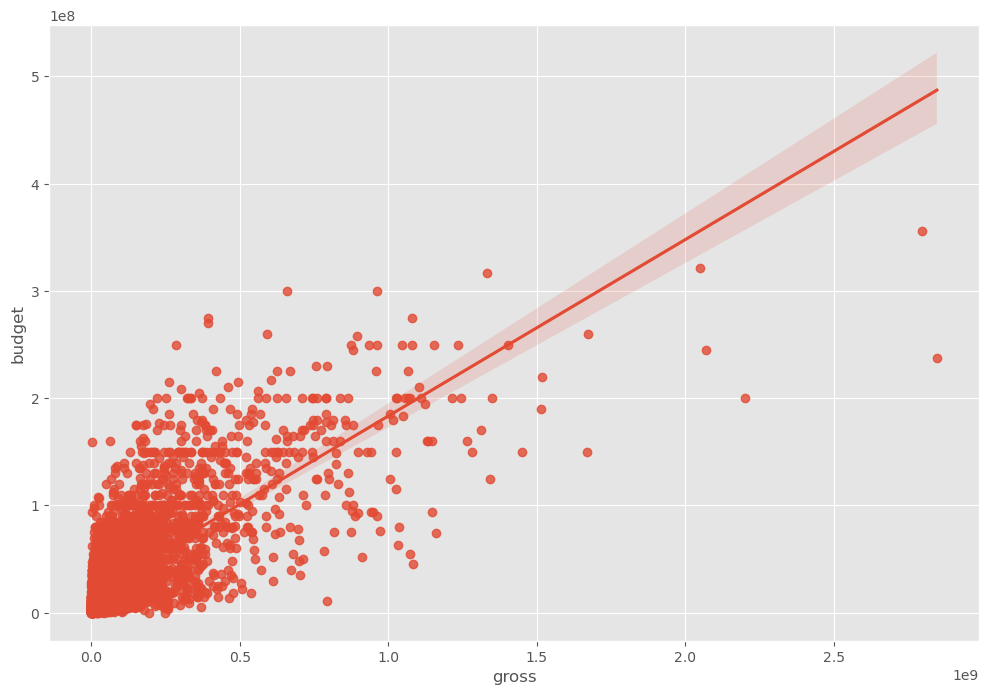

In [43]:
sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

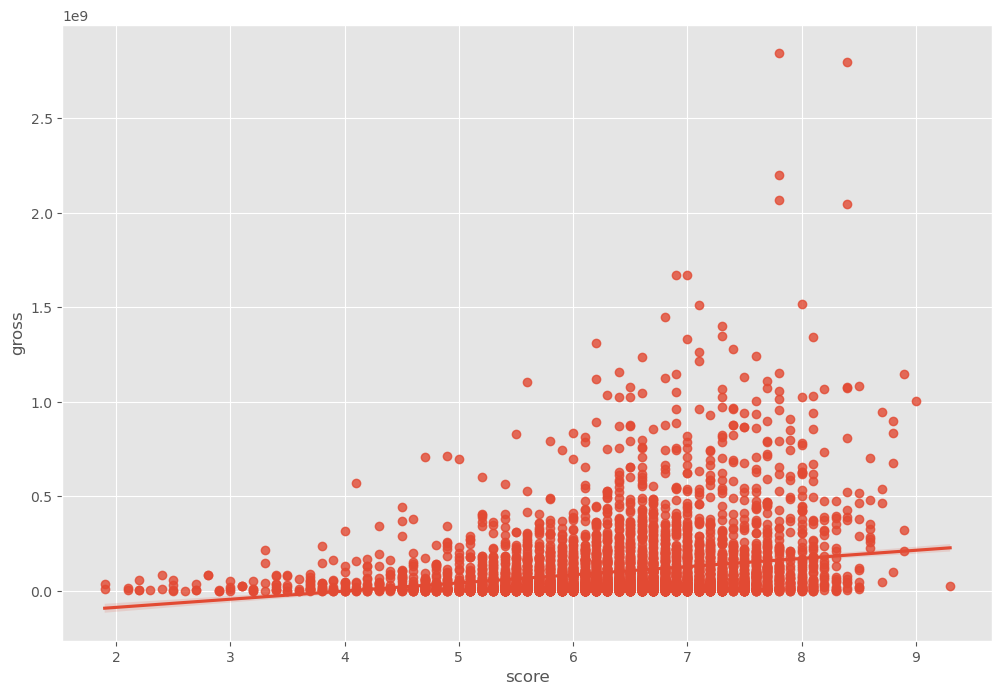

In [44]:
sns.regplot(x="score", y="gross", data=df)

In [45]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.020451,0.012411,0.024335,-0.006231,0.015074,0.012639,0.013984,0.011479,-0.007061,-0.024731,0.023620,0.005721,0.020958,0.010747,-0.007293
rating,-0.020451,1.000000,0.128329,0.019502,0.020630,0.061090,0.007375,0.015042,-0.006661,0.001929,0.018929,-0.187345,-0.167764,-0.083688,0.127415,0.015867
genre,0.012411,0.128329,1.000000,-0.071001,0.023383,0.021769,-0.129370,-0.009665,0.016123,0.001004,-0.009611,-0.356105,-0.234013,-0.069008,-0.066917,0.021050
year,0.024335,0.019502,-0.071001,1.000000,-0.000845,0.055391,0.205852,-0.037164,-0.024674,-0.033242,-0.066074,0.327793,0.274354,-0.013061,0.074203,-0.004095
released,-0.006231,0.020630,0.023383,-0.000845,1.000000,0.046028,0.027477,0.003400,0.009046,0.015265,-0.017365,0.017472,0.006297,-0.004300,0.008596,0.995545
score,0.015074,0.061090,0.021769,0.055391,0.046028,1.000000,0.473789,0.005610,0.013075,0.009205,-0.046735,0.071821,0.222100,0.020513,0.414580,0.045570
votes,0.012639,0.007375,-0.129370,0.205852,0.027477,0.473789,1.000000,-0.009980,-0.005213,-0.016938,0.041253,0.440035,0.614895,0.119155,0.352437,0.027883
director,0.013984,0.015042,-0.009665,-0.037164,0.003400,0.005610,-0.009980,1.000000,0.262657,0.035896,0.009546,-0.009506,-0.029383,-0.007332,0.017907,0.004566
writer,0.011479,-0.006661,0.016123,-0.024674,0.009046,0.013075,-0.005213,0.262657,1.000000,0.019275,0.022596,-0.039186,-0.035748,-0.002907,-0.016848,0.008143
star,-0.007061,0.001929,0.001004,-0.033242,0.015265,0.009205,-0.016938,0.035896,0.019275,1.000000,-0.009827,-0.020605,0.000408,0.014546,0.012309,0.014708


In [46]:
df.corr(method ='kendall')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.015723,0.005107,0.017867,-0.003936,0.005695,0.003030,0.009042,0.007903,-0.004858,-0.019818,0.014593,0.000625,0.013856,0.009915,-0.004763
rating,-0.015723,1.000000,0.132903,-0.013841,0.023701,0.065987,-0.007361,0.005897,0.000941,0.013963,-0.006329,-0.202670,-0.194050,-0.082640,0.084961,0.023033
genre,0.005107,0.132903,1.000000,-0.058944,0.015598,0.044655,-0.133997,-0.006153,0.011098,0.001873,-0.014202,-0.276560,-0.195408,-0.059561,-0.028286,0.016815
year,0.017867,-0.013841,-0.058944,1.000000,-0.000727,0.038564,0.295964,-0.024305,-0.017943,-0.022746,-0.057075,0.220943,0.239345,-0.004735,0.064106,-0.004563
released,-0.003936,0.023701,0.015598,-0.000727,1.000000,0.028311,0.005504,0.002561,0.005702,0.009883,-0.016734,-0.000176,-0.015901,0.001340,0.011319,0.957443
score,0.005695,0.065987,0.044655,0.038564,0.028311,1.000000,0.350149,0.009148,0.009288,0.005849,-0.101495,-0.006399,0.124741,0.010103,0.292872,0.029562
votes,0.003030,-0.007361,-0.133997,0.295964,0.005504,0.350149,1.000000,-0.001175,-0.001110,-0.006941,0.008699,0.346255,0.553633,0.108899,0.205616,0.004866
director,0.009042,0.005897,-0.006153,-0.024305,0.002561,0.009148,-0.001175,1.000000,0.197794,0.024153,-0.006065,-0.002476,-0.008562,-0.005777,0.002828,0.003342
writer,0.007903,0.000941,0.011098,-0.017943,0.005702,0.009288,-0.001110,0.197794,1.000000,0.013091,0.014673,-0.014813,-0.009911,-0.002037,-0.020952,0.005945
star,-0.004858,0.013963,0.001873,-0.022746,0.009883,0.005849,-0.006941,0.024153,0.013091,1.000000,-0.010609,-0.011000,-0.006502,0.008427,0.003209,0.009843


In [47]:
df.corr(method ='spearman')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.020321,0.007035,0.026667,-0.006091,0.008348,0.004457,0.013397,0.011720,-0.007266,-0.025262,0.021856,0.001123,0.020842,0.015012,-0.006953
rating,-0.020321,1.000000,0.162400,-0.016125,0.031502,0.083554,-0.009734,0.007739,0.001103,0.018164,-0.007185,-0.260034,-0.249713,-0.105310,0.109176,0.029534
genre,0.007035,0.162400,1.000000,-0.080044,0.021567,0.060796,-0.183524,-0.008227,0.015470,0.002921,-0.016996,-0.373424,-0.269112,-0.082352,-0.041123,0.022262
year,0.026667,-0.016125,-0.080044,1.000000,-0.001908,0.056523,0.426676,-0.036147,-0.026548,-0.033447,-0.071977,0.313121,0.350713,-0.007718,0.094396,-0.006835
released,-0.006091,0.031502,0.021567,-0.001908,1.000000,0.042288,0.006739,0.003819,0.008531,0.015048,-0.021289,-0.000748,-0.026704,0.001622,0.017115,0.996456
score,0.008348,0.083554,0.060796,0.056523,0.042288,1.000000,0.495424,0.013318,0.013764,0.008847,-0.126514,-0.009959,0.182893,0.014394,0.413040,0.042361
votes,0.004457,-0.009734,-0.183524,0.426676,0.006739,0.495424,1.000000,-0.001893,-0.001400,-0.010512,0.011087,0.493454,0.745822,0.161281,0.300959,0.005373
director,0.013397,0.007739,-0.008227,-0.036147,0.003819,0.013318,-0.001893,1.000000,0.263751,0.036031,-0.007643,-0.003415,-0.012622,-0.008808,0.004135,0.004862
writer,0.011720,0.001103,0.015470,-0.026548,0.008531,0.013764,-0.001400,0.263751,1.000000,0.019288,0.018542,-0.021851,-0.014788,-0.003186,-0.031321,0.008570
star,-0.007266,0.018164,0.002921,-0.033447,0.015048,0.008847,-0.010512,0.036031,0.019288,1.000000,-0.013512,-0.016405,-0.009506,0.012513,0.004787,0.014354


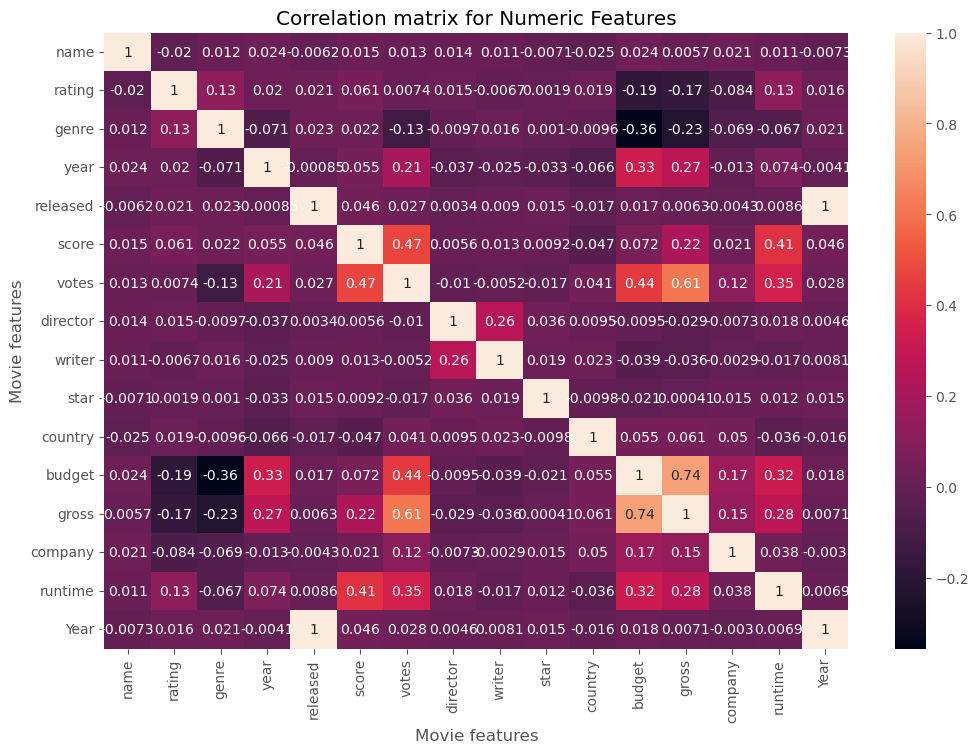

In [48]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [50]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,0.167369,0.028253,0.965585,0.966189,-0.020512,0.295355,0.724954,0.792197,0.694892,0.098517,0.288415,0.968014,0.535454,0.049122,0.036607
rating,0.167369,1.000000,-0.115405,0.176882,0.168703,0.035468,0.093557,0.095448,0.127061,0.114996,0.001712,0.202042,0.170103,-0.024824,0.032838,-0.030385
genre,0.028253,-0.115405,1.000000,0.031442,0.031046,-0.025650,-0.011166,0.037392,0.033341,0.045602,-0.002927,0.019691,0.031871,0.014970,-0.001107,0.007691
year,0.965585,0.176882,0.031442,1.000000,0.996545,-0.015093,0.322068,0.747380,0.812030,0.719127,0.095319,0.318471,0.996432,0.537892,0.056058,0.036310
released,0.966189,0.168703,0.031046,0.996545,1.000000,-0.019930,0.311350,0.750398,0.809534,0.719807,0.097223,0.309077,0.998494,0.546096,0.049772,0.031194
score,-0.020512,0.035468,-0.025650,-0.015093,-0.019930,1.000000,-0.041229,-0.006762,-0.021718,0.014688,0.016169,-0.006563,-0.016188,-0.009416,0.011792,0.032814
votes,0.295355,0.093557,-0.011166,0.322068,0.311350,-0.041229,1.000000,0.186398,0.223030,0.180918,-0.021962,0.357159,0.305399,0.007020,0.126804,-0.058652
director,0.724954,0.095448,0.037392,0.747380,0.750398,-0.006762,0.186398,1.000000,0.717631,0.636196,0.095624,0.123000,0.751281,0.483568,-0.027831,0.039601
writer,0.792197,0.127061,0.033341,0.812030,0.809534,-0.021718,0.223030,0.717631,1.000000,0.626315,0.099373,0.207039,0.811039,0.477898,0.022642,0.043921
star,0.694892,0.114996,0.045602,0.719127,0.719807,0.014688,0.180918,0.636196,0.626315,1.000000,0.100104,0.137576,0.720510,0.441842,0.033018,0.048860


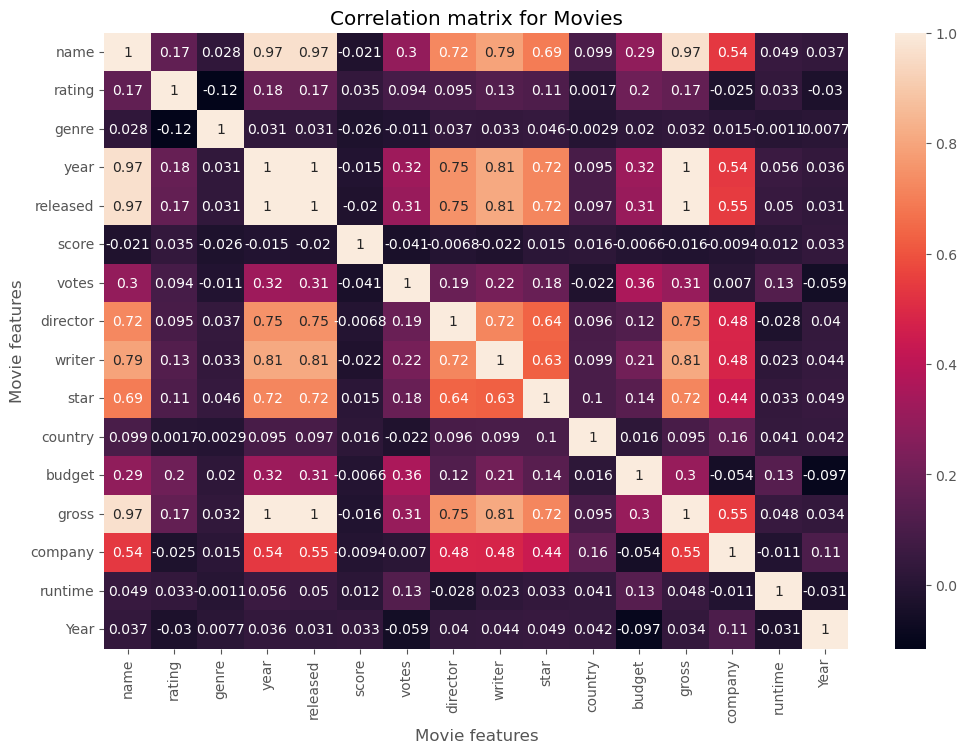

In [51]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [52]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name  name        1.000000
      rating      0.167369
      genre       0.028253
      year        0.965585
      released    0.966189
                    ...   
Year  budget     -0.096530
      gross       0.034215
      company     0.107856
      runtime    -0.031148
      Year        1.000000
Length: 256, dtype: float64


In [53]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre    rating    -0.115405
rating   genre     -0.115405
Year     budget    -0.096530
budget   Year      -0.096530
Year     votes     -0.058652
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
Year     Year       1.000000
Length: 256, dtype: float64


In [54]:
# high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company  name       0.535454
name     company    0.535454
company  year       0.537892
year     company    0.537892
gross    company    0.545967
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
Year     Year       1.000000
Length: 66, dtype: float64


In [55]:
# top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
2319    54773202654
2281    51241105418
731     42356430218
1812    40021704691
2253    39542573303
2316    35833650748
1713    19628786232
1606    15065592411
887     11873612858
889     11593807697
2232    10664679494
1637     8937010092
2147     8318570396
1856     7886344526
1109     7243673721
Name: gross, dtype: int64

In [56]:
df['Year'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,574,6,0,2020,1201,6.6,140000.0,24,3365,2761,55,90000000.0,426505244.0,731,124.0,1201
7649,5037,4,0,2020,944,6.5,102000.0,1251,3253,229,55,85000000.0,319715683.0,1812,99.0,944
7650,1619,4,1,2020,1201,5.6,53000.0,2606,4007,2241,55,175000000.0,245487753.0,2281,101.0,1201
7651,5634,4,1,2020,1009,6.8,42000.0,451,2954,959,6,135000000.0,111105497.0,18,100.0,1009


In [57]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company year             
-1      1984    2687148.0
        1989    1097333.0
 0      2003   44350926.0
 1      2019  193457467.0
 2      1996      10580.0
...                   ...
 2379   2013     587174.0
 2380   2015   17986781.0
 2381   2001   10031529.0
 2383   2010    7099598.0
 2384   2017   62198461.0

[2999 rows x 1 columns]

In [58]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company  year
2316     2019    5773131804
1606     2018    4018631866
2281     2015    3834354888
2253     2009    3793491246
2316     2017    3789382071
1812     2011    3565705182
2319     2011    3223799224
2316     2010    3104474158
1812     2014    3071298586
731      2006    2934631933
         2019    2932757449
1606     2019    2797501328
2319     2018    2774168962
731      2011    2738363306
2319     2005    2688767210
Name: gross, dtype: int64

In [59]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
2319    54773202654
2281    51241105418
731     42356430218
1812    40021704691
2253    39542573303
2316    35833650748
1713    19628786232
1606    15065592411
887     11873612858
889     11593807697
2232    10664679494
1637     8937010092
2147     8318570396
1856     7886344526
1109     7243673721
Name: gross, dtype: int64

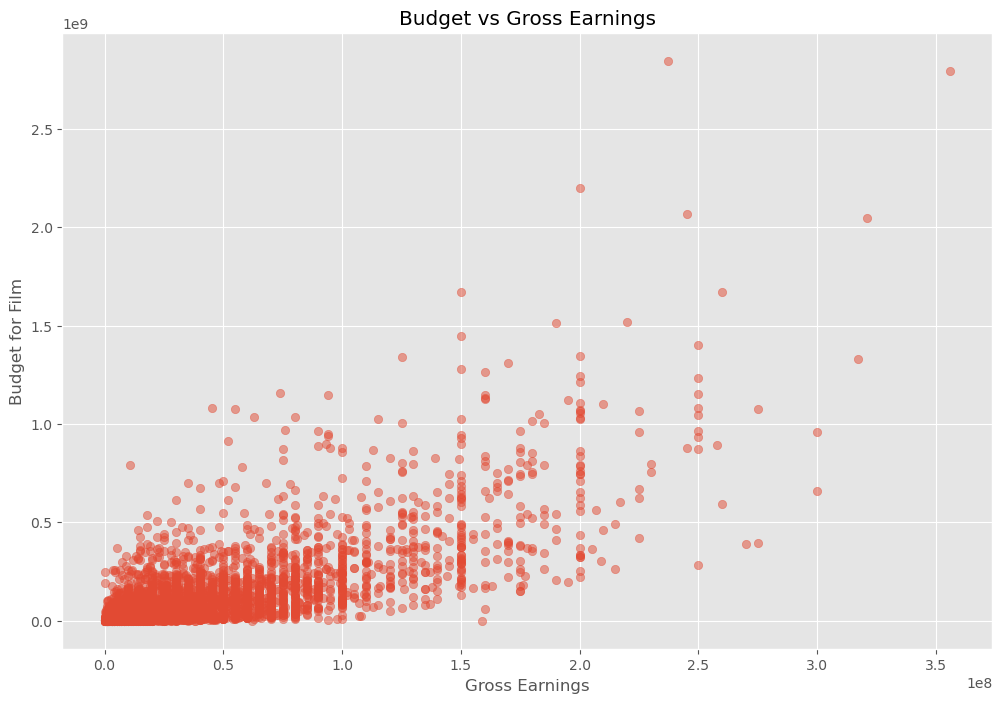

In [60]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [61]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,574,6,0,2020,1201,6.6,140000.0,24,3365,2761,55,90000000.0,426505244.0,731,124.0,1201
7649,5037,4,0,2020,944,6.5,102000.0,1251,3253,229,55,85000000.0,319715683.0,1812,99.0,944
7650,1619,4,1,2020,1201,5.6,53000.0,2606,4007,2241,55,175000000.0,245487753.0,2281,101.0,1201
7651,5634,4,1,2020,1009,6.8,42000.0,451,2954,959,6,135000000.0,111105497.0,18,100.0,1009


In [62]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,616
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,421
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,678
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,421
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,574,6,0,2020,1201,6.6,140000.0,24,3365,2761,55,90000000.0,426505244.0,731,124.0,170
7649,5037,4,0,2020,944,6.5,102000.0,1251,3253,229,55,85000000.0,319715683.0,1812,99.0,2524
7650,1619,4,1,2020,1201,5.6,53000.0,2606,4007,2241,55,175000000.0,245487753.0,2281,101.0,170
7651,5634,4,1,2020,1009,6.8,42000.0,451,2954,959,6,135000000.0,111105497.0,18,100.0,10


In [63]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.020451,0.012411,0.024335,-0.006231,0.015074,0.012639,0.013984,0.011479,-0.007061,-0.024731,0.023620,0.005721,0.020958,0.010747,0.005914
rating,-0.020451,1.000000,0.128329,0.019502,0.020630,0.061090,0.007375,0.015042,-0.006661,0.001929,0.018929,-0.187345,-0.167764,-0.083688,0.127415,-0.003528
genre,0.012411,0.128329,1.000000,-0.071001,0.023383,0.021769,-0.129370,-0.009665,0.016123,0.001004,-0.009611,-0.356105,-0.234013,-0.069008,-0.066917,0.028210
year,0.024335,0.019502,-0.071001,1.000000,-0.000845,0.055391,0.205852,-0.037164,-0.024674,-0.033242,-0.066074,0.327793,0.274354,-0.013061,0.074203,-0.009889
released,-0.006231,0.020630,0.023383,-0.000845,1.000000,0.046028,0.027477,0.003400,0.009046,0.015265,-0.017365,0.017472,0.006297,-0.004300,0.008596,0.007267
score,0.015074,0.061090,0.021769,0.055391,0.046028,1.000000,0.473789,0.005610,0.013075,0.009205,-0.046735,0.071821,0.222100,0.020513,0.414580,0.009630
votes,0.012639,0.007375,-0.129370,0.205852,0.027477,0.473789,1.000000,-0.009980,-0.005213,-0.016938,0.041253,0.440035,0.614895,0.119155,0.352437,-0.005024
director,0.013984,0.015042,-0.009665,-0.037164,0.003400,0.005610,-0.009980,1.000000,0.262657,0.035896,0.009546,-0.009506,-0.029383,-0.007332,0.017907,-0.019216
writer,0.011479,-0.006661,0.016123,-0.024674,0.009046,0.013075,-0.005213,0.262657,1.000000,0.019275,0.022596,-0.039186,-0.035748,-0.002907,-0.016848,-0.002521
star,-0.007061,0.001929,0.001004,-0.033242,0.015265,0.009205,-0.016938,0.035896,0.019275,1.000000,-0.009827,-0.020605,0.000408,0.014546,0.012309,0.002983


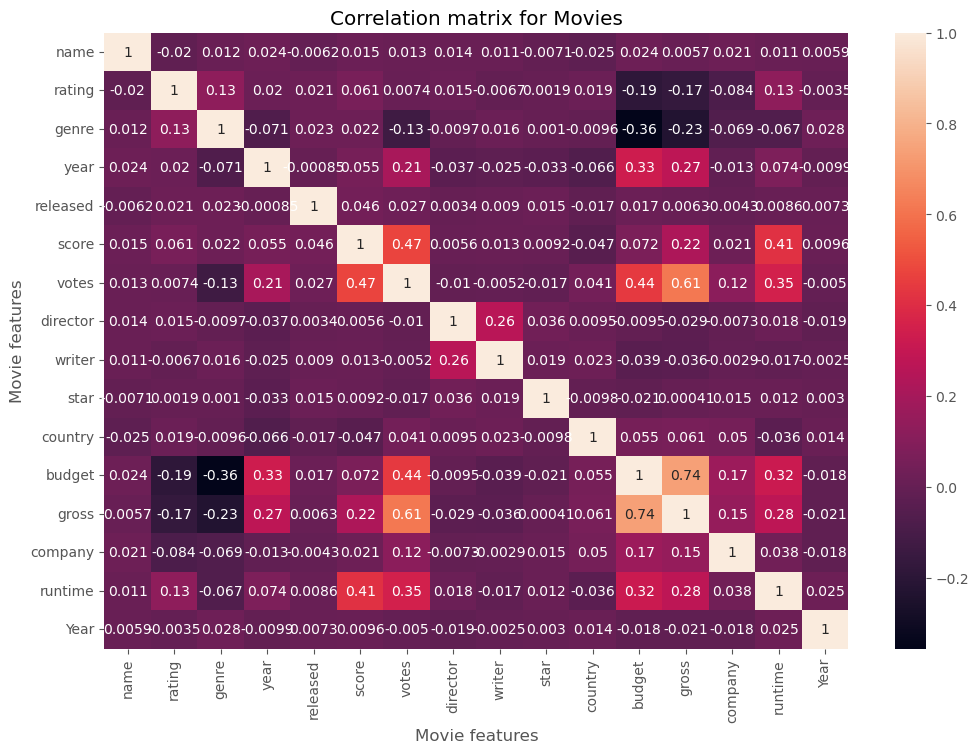

In [64]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()